In [210]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import free_fermion_representation as f
import honeycomb_plot as honey
import importlib
importlib.reload(site)
importlib.reload(honey)
importlib.reload(f)

<module 'free_fermion_representation' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/free_fermion_representation.py'>

Current sites: [72, 74, 76, 78]


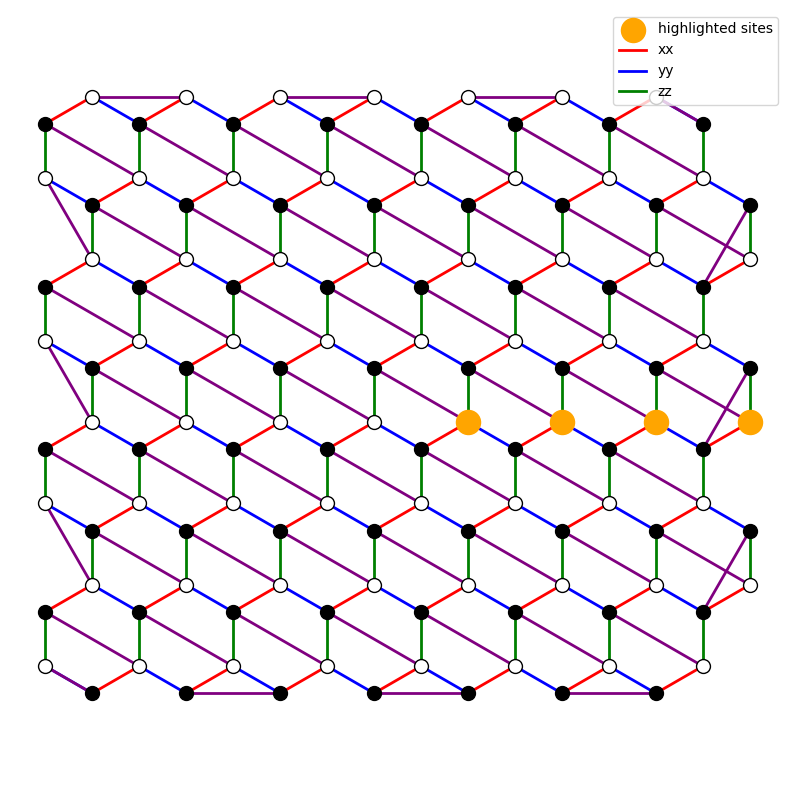

In [211]:
model = site.SitesOBC(Npx = 7, Npy = 7, edge = True)

# model.get_diagonalbonds()
# otherbonds = model.links_list
# otherbonds_list = []
# for a in otherbonds:
#     for i,j in a:
#         otherbonds_list.append([i,j])

current_list = model.get_current_sites()
print("Current sites:", current_list)

honey.plot_honeycomb(model, plot_anyon_bonds = False, 
                    plot_diagonal_bonds=True, 
                    fig_size=(10,10),
                    sites= current_list
                     #otherbonds_list=otherbonds_list
                     )


In [203]:
fgs = f.FermionicGaussianRepresentation(model)

## Order parameter vs Delta


### First method

In [204]:
T = 1
delta = 1000
N_cycle = 10

_, _, _, R0 = fgs.floquet_operator_ham(T)
_, _, _, Re = fgs.floquet_operator_ham(T, anyon=True)
V0 = f.generate_disorder_term(model, fgs.Cov, delta)
Ve = f.generate_disorder_term(model, fgs.Cov, delta, type="Anyon")
R_V0 = f.floquet_operator(V0, T, alpha = 1)
R_Ve = f.floquet_operator(Ve, T, alpha = 1)


In [205]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

exp_value = []

for _ in range(10):

    n = fgs.expectation_value_loop()
    print(n)
    exp_value.append(n)

    fgs.update_cov_0_matrix(R0)
    fgs.update_cov_0_matrix(R_V0)

    fgs.update_cov_e_matrix(Re)
    fgs.update_cov_e_matrix(R_Ve)


n = fgs.expectation_value_loop()
exp_value.append(n)
print(n)

(np.complex128(1+0j), np.complex128(1+0j))
(np.complex128(1.0000000000000198+0j), np.complex128(-0.9999999999972581+0j))
(np.complex128(1.00000000000004+0j), np.complex128(0.9999999999945159+0j))
(np.complex128(1.000000000000059+0j), np.complex128(-0.9999999999917745+0j))
(np.complex128(1.0000000000000797+0j), np.complex128(0.9999999999890323+0j))
(np.complex128(1.0000000000001001+0j), np.complex128(-0.9999999999862909+0j))
(np.complex128(1.0000000000001197+0j), np.complex128(0.9999999999835495+0j))
(np.complex128(1.0000000000001394+0j), np.complex128(-0.999999999980808+0j))
(np.complex128(1.0000000000001594+0j), np.complex128(0.9999999999780657+0j))
(np.complex128(1.0000000000001799+0j), np.complex128(-0.9999999999753238+0j))
(np.complex128(1.0000000000002005+0j), np.complex128(0.9999999999725819+0j))


### Second method

In [206]:
T = 1
delta = 0.1
N_cycle = 10


V0 = f.generate_disorder_term(model, fgs.Cov, delta)
Ve = f.generate_disorder_term(model, fgs.Cov, delta, type="Anyon")

Rx = f.floquet_operator(-np.pi/4*fgs.h0_x + V0, T, alpha = 1)
Ry = f.floquet_operator(-np.pi/4*fgs.h0_y + V0, T, alpha = 1)
Rz = f.floquet_operator(-np.pi/4*fgs.h0_z + V0, T, alpha = 1)
R0 = Rz @ Ry @ Rx

Rx_e = f.floquet_operator(-np.pi/4*fgs.he_x+ Ve, T, alpha = 1)
Ry_e = f.floquet_operator(-np.pi/4*fgs.he_y + Ve, T, alpha = 1)
Rz_e = f.floquet_operator(-np.pi/4*fgs.he_z + Ve, T, alpha = 1)
Re = Rz_e @ Ry_e @ Rx_e



In [207]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

exp_value = []

for _ in range(10):

    n = fgs.expectation_value_loop()
    print(n)
    exp_value.append(n)

    fgs.update_cov_0_matrix(R0)
    fgs.update_cov_e_matrix(Re)



n = fgs.expectation_value_loop()
exp_value.append(n)
print(n)

(np.complex128(1+0j), np.complex128(1+0j))
(np.complex128(0.27015353115886115+0j), np.complex128(-0.21166608177778193+0j))
(np.complex128(0.37855009455363753+0j), np.complex128(0.29662625160071077+0j))
(np.complex128(0.15088696866332468+0j), np.complex128(-0.10879975571297265+0j))
(np.complex128(0.08868285007237856+0j), np.complex128(0.08628395989600816+0j))
(np.complex128(0.03618394251354455+0j), np.complex128(-0.05817839598316188+0j))
(np.complex128(0.02018516450300351+0j), np.complex128(0.08114384285778331+0j))
(np.complex128(0.038520296243367357+0j), np.complex128(-0.07277204177243823+0j))
(np.complex128(0.022460844873780292+0j), np.complex128(0.07576178754096304+0j))
(np.complex128(0.007736744630753425+0j), np.complex128(-0.08005636596795236+0j))
(np.complex128(0.01708668250096965+0j), np.complex128(0.09527484729527068+0j))


## Current!

In [191]:
model = site.SitesOBC(Npx = 5, Npy = 5, edge = True)
fgs = f.FermionicGaussianRepresentation(model)

In [192]:
T = 1
delta = 1
N_cycle = 10

In [193]:
V0 = f.generate_disorder_term(model, fgs.Cov, delta, disc = True)

Rx = f.floquet_operator(-np.pi/4*fgs.h0_x + V0, T, alpha = 1)
Ry = f.floquet_operator(-np.pi/4*fgs.h0_y + V0, T, alpha = 1)
Rz = f.floquet_operator(-np.pi/4*fgs.h0_z + V0, T, alpha = 1)
R0 = Rz @ Ry @ Rx


In [194]:
density = []
current = []

fgs.reset_cov_0_matrix()

for _ in range(N_cycle):

    density.append(fgs.current_density())
    fgs.update_cov_0_matrix(R0)

density.append(fgs.current_density())

print(len(density))

for i in range(N_cycle):
    transport = 0
    for j in range(len(density[i])):
        transport += density[i+1][j] - density[i][j]
    current.append(transport)

average_current = np.mean(current)

print("Average current:", average_current)

11
Average current: (0.13836922748888442+0j)


In [195]:
#create function to plot average current vs delta

def plot_average_current_vs_delta(Np, delta_list, N_cycle=10, T = 1, disc = True, standard = False):
    model = site.SitesOBC(Npx = Np, Npy = Np, edge = True)
    fgs = f.FermionicGaussianRepresentation(model)

    average_current_list = []

    for delta in delta_list:
        print(f"Calculating for delta = {delta}")
        
        fgs.reset_cov_0_matrix()

        V0 = f.generate_disorder_term(model, fgs.Cov, delta, disc = disc)

        Rx = f.floquet_operator(-np.pi/4*fgs.h0_x + V0, T, alpha = 1)
        Ry = f.floquet_operator(-np.pi/4*fgs.h0_y + V0, T, alpha = 1)
        Rz = f.floquet_operator(-np.pi/4*fgs.h0_z + V0, T, alpha = 1)
        R0 = Rz @ Ry @ Rx

        density = []
        current = []

        for _ in range(N_cycle):

            density.append(fgs.current_density(standard = standard))
            fgs.update_cov_0_matrix(R0)

        density.append(fgs.current_density(standard = standard))

        for i in range(N_cycle):
            transport = 0
            for j in range(len(density[i])):
                transport += density[i+1][j] - density[i][j]
            current.append(transport)

        average_current = np.mean(current)
        average_current_list.append(average_current)

    plt.figure(figsize=(10, 6))
    plt.plot(delta_list, average_current_list, marker='o')
    plt.xlabel('Disorder Strength (Delta)')
    plt.ylabel('Average Current')
    plt.title(f'Average Current vs Disorder Strength for Np={Np}')
    # plt.grid()
    plt.show()
    return average_current_list

Calculating for delta = 1.0
Calculating for delta = 1.6551724137931034
Calculating for delta = 2.310344827586207
Calculating for delta = 2.9655172413793105
Calculating for delta = 3.6206896551724137
Calculating for delta = 4.275862068965517
Calculating for delta = 4.931034482758621
Calculating for delta = 5.586206896551724
Calculating for delta = 6.241379310344827
Calculating for delta = 6.896551724137931
Calculating for delta = 7.551724137931034
Calculating for delta = 8.206896551724139
Calculating for delta = 8.862068965517242
Calculating for delta = 9.517241379310345
Calculating for delta = 10.172413793103448
Calculating for delta = 10.827586206896552
Calculating for delta = 11.482758620689655
Calculating for delta = 12.137931034482758
Calculating for delta = 12.793103448275861
Calculating for delta = 13.448275862068964
Calculating for delta = 14.103448275862068
Calculating for delta = 14.758620689655173
Calculating for delta = 15.413793103448276
Calculating for delta = 16.068965517

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


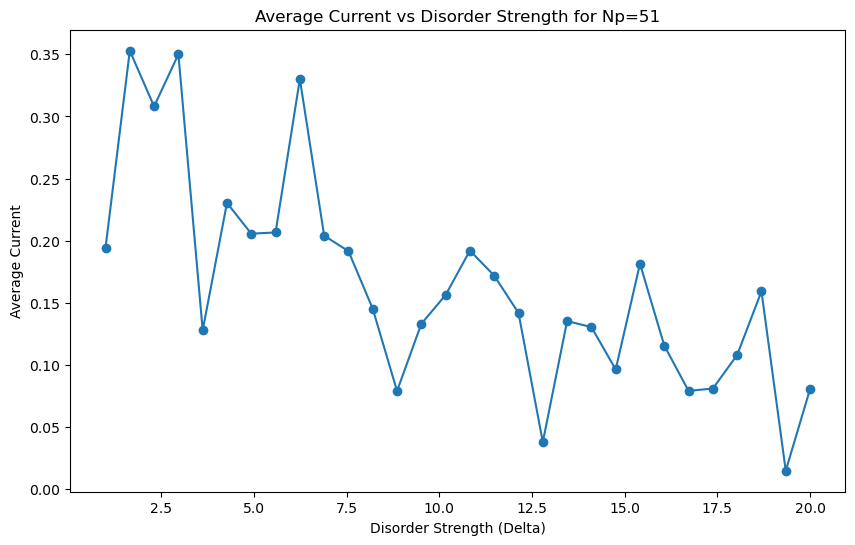

In [197]:
delta_list = np.linspace(1, 20, 30)
average_current = plot_average_current_vs_delta(51, delta_list, N_cycle=50, T=1, disc = False, standard = False)

In [198]:
import pickle

with open('average_current.pkl', 'wb') as f:
    pickle.dump(average_current, f)

In [181]:
with open('average_current.pkl', 'rb') as f:
    average_current = pickle.load(f)

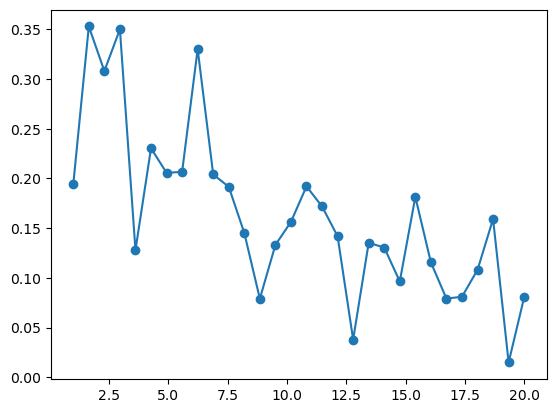

In [199]:
plt.plot(delta_list, average_current, marker='o')

It's clear that at the moment this current does not work!